 #  <p style="text-align: center;">Technical Support Data Analysis

Technical support data can often be a rich source of information on opportunities for improving customer experience. The lesser the trouble customers have with the product the better. Even better when the customers are able to overcome
technical challenge quickly with minimal effort. Let us analyze the tech support data and do some basic analysis on problem types, time to resolve the problem and channel of suppor that is most suitable

## Loading the Dataset

In [0]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pylab as plt
from sklearn.model_selection  import train_test_split
from sklearn.cluster import KMeans
#import sklearn.metrics

tech_supp_df = pd.read_csv("technical_support_data.csv")
tech_supp_df.dtypes

PROBLEM_TYPE              object
no_of_cases                int64
Avg_pending_calls        float64
Avg_resol_time             int64
recurrence_freq          float64
Replace_percent          float64
In_warranty_percent        int64
Post_warranty_percent      int64
dtype: object

The dataset contains one record for each unique problem type. It has metrics for each type like count, average calls to resolve, average resolution time etc.

In [0]:
tech_supp_df.head()

,PROBLEM_TYPE,no_of_cases,Avg_pending_calls,Avg_resol_time,recurrence_freq,Replace_percent,In_warranty_percent,Post_warranty_percent
0,Temperature control not working,170,1.3,32,0.04,0.0,75,25
1,power chord does not tightly fit,12,2.0,150,0.01,0.5,5,95
2,Fan swing not working,5,1.0,35,0.02,0.2,90,10
3,Main switch does not on,3,2.0,8,0.01,0.7,5,95
4,Forgot mobile app password,45,2.3,54,0.15,0.0,99,1


## Group Data into similar clusters

Now, we will use K-Means clustering to group data based on their attribute. First, we need to determine the optimal number of groups. For that we conduct the knee test to see where the knee happens.

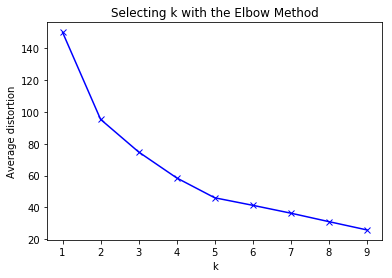

In [0]:
tech_supp_attributes = tech_supp_df.drop("PROBLEM_TYPE",axis=1)

#Finding optimal no. of clusters
from scipy.spatial.distance import cdist
clusters=range(1,10)
meanDistortions=[]

for k in clusters:
    model=KMeans(n_clusters=k)
    model.fit(tech_supp_attributes)
    prediction=model.predict(tech_supp_attributes)
    meanDistortions.append(sum(np.min(cdist(tech_supp_attributes, model.cluster_centers_, 'euclidean'), axis=1)) / tech_supp_attributes.shape[0])


plt.plot(clusters, meanDistortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Average distortion')
plt.title('Selecting k with the Elbow Method')


Though the bend is not coming out clearly as there are many bends, let us look at 2 clusters and 3 clusters

In [0]:
# Let us first start with K = 2
final_model=KMeans(2)
final_model.fit(tech_supp_attributes)
prediction=final_model.predict(tech_supp_attributes)

#Append the prediction 
tech_supp_df["GROUP"] = prediction
print("Groups Assigned : \n")
tech_supp_df[["PROBLEM_TYPE", "GROUP"]]

Groups Assigned : 



,PROBLEM_TYPE,GROUP
0,Temperature control not working,0
1,power chord does not tightly fit,0
2,Fan swing not working,0
3,Main switch does not on,0
4,Forgot mobile app password,0
5,AC stops abruptly,0
6,App hangs while entring commands,0
7,App takes a long time to initialize,0
8,Unable to connect the App to the device,1
9,Reinstalling the app hangs the phone,0


Analyze the distribution of the data among the two groups (K = 2). One of the most informative visual tool is boxplot.


{'boxes': [<matplotlib.lines.Line2D at 0x224cb9f74a8>,
 'caps': [<matplotlib.lines.Line2D at 0x224cb9fee80>,
 'fliers': [<matplotlib.lines.Line2D at 0x224cba0d748>,
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x224cba06898>,
 'whiskers': [<matplotlib.lines.Line2D at 0x224cb9f7e10>,
  <matplotlib.lines.Line2D at 0x224cba15fd0>]}

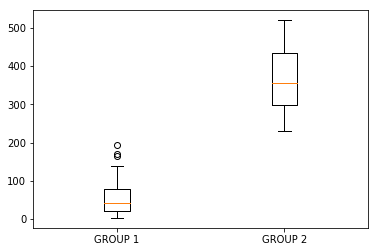

In [0]:
#plt.cla()

plt.boxplot([[tech_supp_df["no_of_cases"][tech_supp_df.GROUP==0]],
             [tech_supp_df["no_of_cases"][tech_supp_df.GROUP==1]] ],
              labels=('GROUP 1','GROUP 2'))

In [0]:
# The K = 2 boxplot clearly shows outliers in group 1. Indicating that the group 1 is stretched
# indicating probability of another cluster. Let us try with K = 3, the next elbow point

In [0]:
# Let us first start with K = 3
final_model=KMeans(3)
final_model.fit(tech_supp_attributes)
prediction=final_model.predict(tech_supp_attributes)

#Append the prediction 
tech_supp_df["GROUP"] = prediction
print("Groups Assigned : \n")
tech_supp_df[["PROBLEM_TYPE", "GROUP"]]
tech_supp_df.info

Groups Assigned : 



<bound method DataFrame.info of                                  PROBLEM_TYPE  no_of_cases  Avg_pending_calls  \
0             Temperature control not working          170                1.3   
1            power chord does not tightly fit           12                2.0   
2                       Fan swing not working            5                1.0   
3                     Main switch does not on            3                2.0   
4                  Forgot mobile app password           45                2.3   
5                           AC stops abruptly           47                3.1   
6            App hangs while entring commands           12                4.0   
7         App takes a long time to initialize          165                1.2   
8     Unable to connect the App to the device          321                1.0   
9        Reinstalling the app hangs the phone           22                3.3   
10       Mobile screen blanks on use of phone           23                4.3

{'boxes': [<matplotlib.lines.Line2D at 0x158cb7a2748>,
 'caps': [<matplotlib.lines.Line2D at 0x158cb7abac8>,
 'fliers': [<matplotlib.lines.Line2D at 0x158cb7b99e8>,
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x158cb7b1b38>,
 'whiskers': [<matplotlib.lines.Line2D at 0x158cb7a2908>,
  <matplotlib.lines.Line2D at 0x158cb7dfba8>]}

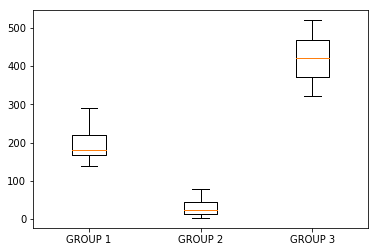

In [0]:
#plt.cla()

plt.boxplot([[tech_supp_df["no_of_cases"][tech_supp_df.GROUP==0]],
             [tech_supp_df["no_of_cases"][tech_supp_df.GROUP==1]] ,
             [tech_supp_df["no_of_cases"][tech_supp_df.GROUP==2]] ],
              labels=('GROUP 1','GROUP 2','GROUP 3'))


In [0]:
#Analyzing in terms of k = 3 seems to give a better segregation of the technical support tickets than K=2. 
#The boxes are tighter indicating the spread of data is much less in K = 3 than in K = 2 and there are no outliers!

{'boxes': [<matplotlib.lines.Line2D at 0x25085354908>,
 'caps': [<matplotlib.lines.Line2D at 0x2508535ce10>,
 'fliers': [<matplotlib.lines.Line2D at 0x2508536dd30>,
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x25085365e80>,
 'whiskers': [<matplotlib.lines.Line2D at 0x25085354940>,
  <matplotlib.lines.Line2D at 0x25085394ef0>]}

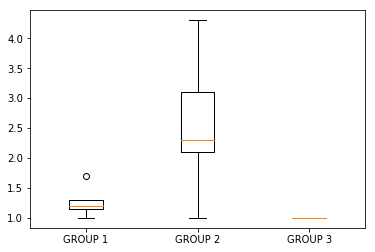

In [0]:
# That we have 3 clusters to work with, let us boxplot on Avg_resol_time in days
plt.cla()
plt.boxplot([[tech_supp_df["Avg_pending_calls"][tech_supp_df.GROUP==0]],
              [tech_supp_df["Avg_pending_calls"][tech_supp_df.GROUP==1]] ,
                [tech_supp_df["Avg_pending_calls"][tech_supp_df.GROUP==2]] ],
            labels=('GROUP 1','GROUP 2','GROUP 3'))
 

From the box plot it is clear that technical issues belonging to group 2 and 3 take much less time to resolve and hence not so many pending calls even though they are them most frequently occuring tech support issues (box plot 1) 

The group 2 and 3 may be most frequently reported issues and take less time to resolve but then do they re-occur i.e. same person reports those issues multiple times and hence the count is high (box plot 1)?

{'boxes': [<matplotlib.lines.Line2D at 0x2103abb0ac8>,
 'caps': [<matplotlib.lines.Line2D at 0x2103abbafd0>,
 'fliers': [<matplotlib.lines.Line2D at 0x2103abc8ef0>,
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x2103abc8080>,
 'whiskers': [<matplotlib.lines.Line2D at 0x2103abb0b00>,
  <matplotlib.lines.Line2D at 0x2103abefa58>]}

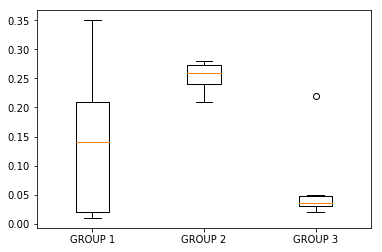

In [0]:
plt.cla()
plt.boxplot([[tech_supp_df["recurrence_freq"][tech_supp_df.GROUP==0]],
              [tech_supp_df["recurrence_freq"][tech_supp_df.GROUP==1]] ,
                [tech_supp_df["recurrence_freq"][tech_supp_df.GROUP==2]] ],
            labels=('GROUP 1','GROUP 2','GROUP 3'))

Group 2 technical issues are reportedly higer in count but most of it is reoccuring!!! Simple to solve issues but re-occur frequently indicating opportunity for quality improvement. This report needs to be brought to the notice of the engineering dept.

Whereas group 3, not so frequently occuring as group 2 has a small percentage of reoccuring cases. Easy to resolve but there is some %age of recurrance indicating probably a need to train the technical support staff to do a quality check before closing the issue

In [0]:
# Analyse the groups by Replace percentage i.e. %age of cases that need replacement

{'boxes': [<matplotlib.lines.Line2D at 0x2103ac977f0>,
 'caps': [<matplotlib.lines.Line2D at 0x2103ac9fcf8>,
 'fliers': [<matplotlib.lines.Line2D at 0x2103acafc18>,
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x2103aca8d68>,
 'whiskers': [<matplotlib.lines.Line2D at 0x2103ac97828>,
  <matplotlib.lines.Line2D at 0x2103acd6dd8>]}

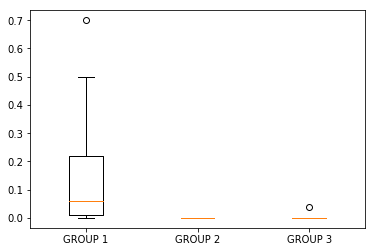

In [0]:
plt.cla()
plt.boxplot([[tech_supp_df["Replace_percent"][tech_supp_df.GROUP==0]],
              [tech_supp_df["Replace_percent"][tech_supp_df.GROUP==1]] ,
                [tech_supp_df["Replace_percent"][tech_supp_df.GROUP==2]] ],
            labels=('GROUP 1','GROUP 2','GROUP 3'))

Replacement rate for group2 and 3 is almost non existent. Yet again indicating that these issues are easy to resolve whereas the group 1 is a cluster of issues that need more effort and maybe replacement too. 

{'boxes': [<matplotlib.lines.Line2D at 0x2103ad7b2e8>,
 'caps': [<matplotlib.lines.Line2D at 0x2103ad82a20>,
 'fliers': [<matplotlib.lines.Line2D at 0x2103ad8dc50>,
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x2103ad8d438>,
 'whiskers': [<matplotlib.lines.Line2D at 0x2103ad7b9b0>,
  <matplotlib.lines.Line2D at 0x2103adb0e10>]}

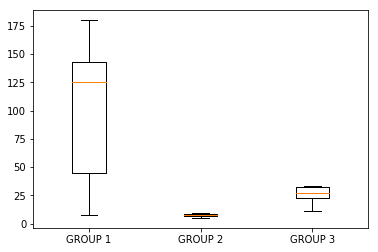

In [0]:
# That we have 3 clusters to work with, let us boxplot on Avg_resol_time in days
plt.cla()
plt.boxplot([[tech_supp_df["Avg_resol_time"][tech_supp_df.GROUP==0]],
              [tech_supp_df["Avg_resol_time"][tech_supp_df.GROUP==1]] ,
                [tech_supp_df["Avg_resol_time"][tech_supp_df.GROUP==2]] ],
            labels=('GROUP 1','GROUP 2','GROUP 3'))
 

In [0]:
# Average resolution time distribution across the three clusters reflects the same information as avg pending cases.

# In view of this analysis, one can think of providing self help facilities to the customer for group 2 and group 3 issues
# Even a chat facility or helpline number may bring down these issues and also customer is likely to feel good
# with immediate help and resolution.
# One may even consider automating the ticket resolutions....
